## Programming and Visualization

Exercise H.01/a

In [3]:
import matplotlib.pyplot as plt
import math 
import numpy as np

In [4]:
mu = 0
sigma = math.sqrt(1)

gaussian = lambda x : (1/(sigma*math.sqrt(2*math.pi))) * np.exp(-(x - mu)**2/2*sigma)

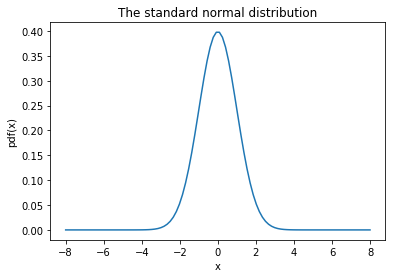

In [5]:
x = np.linspace(-8, 8, 100, endpoint = True)
y = gaussian(x)
plt.plot(x, y)
plt.title("The standard normal distribution")
plt.xlabel("x")
plt.ylabel("pdf(x)")
plt.show()

Exercise H.01/b

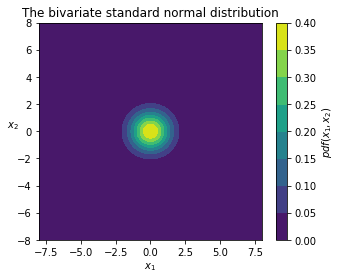

In [6]:
x = y =np.linspace(-8, 8, 100, endpoint = True)
xx,yy = np.meshgrid(x, y)

z = 1./(sigma*np.sqrt(2*math.pi)) * np.exp(-(xx**2+yy**2)/2*sigma)
plt.figure(figsize=(5,4))
h = plt.contourf(xx,yy,z)
ax_cbar = plt.colorbar()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$', rotation='horizontal')
ax_cbar.set_label('$pdf(x_1,x_2)$')
plt.title('The bivariate standard normal distribution')
plt.show()



Exercise H0.2: Comparing apples and oranges

In [7]:
expdat = np.genfromtxt(fname='applesOranges.csv', delimiter=',', 
                       dtype=np.float, skip_header=1)

In [8]:
x = expdat[:,:2]
y = expdat[:,-1]

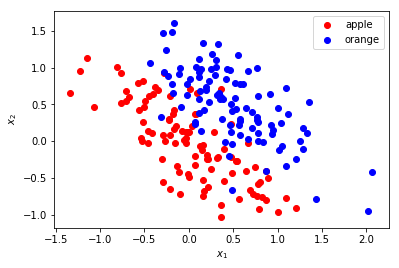

In [9]:
plt.figure()
plt.scatter(x[y==0,0], x[y==0,1], c='r', label='apple')
plt.scatter(x[y==1,0], x[y==1,1], c='b', label='orange')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()

In [16]:
import pandas as pd
df = pd.read_csv("applesOranges.csv")
df.loc[df.y == 0, 'y'] = "Apples"
df.loc[df.y == 1, 'y'] = "Orange"
df= df.rename(columns = {'y': 'categories'})

In [17]:
import seaborn as sns

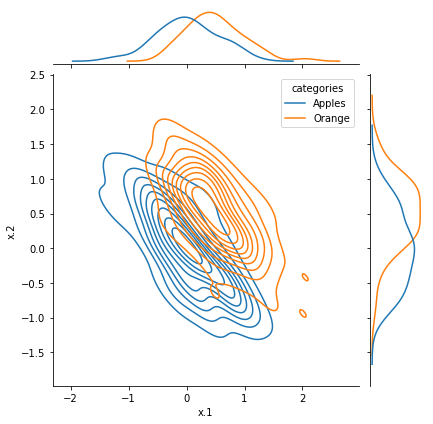

In [18]:
sns.jointplot(
    data=df,
    x="x.1", y="x.2", hue="categories",
    kind="kde"
)

In [103]:
X = np.genfromtxt("applesOranges.csv", delimiter = ',', skip_header=1)
x_1 = X[:, 0:2]
y = X[:, -1]
X = np.vstack((np.ones((1, 200)),x_1.T))
X.shape

(3, 200)

In [104]:
w = np.array([1.05, 2.183, 2.171])

In [105]:
def multWithDot(w, X):
    
    p = [np.dot(w, sample) for sample in X.T]
    return np.array(p)

def multarray(w, xx):
    
    X_tras = X.T
    p = []
    for samp in X_tras:
        sp = 0
        for elw, elx in zip(w, samp):
            
            sp += elw*elx
        p.append(sp)
        
    return p

def multMatrix(w, xx):
    
    """return return w2 @ X"""

    return np.matmul(w, xx)

In [106]:
X_a = multWithDot(w, X)
X_b = multarray(w, X)
X_c = multMatrix(w, X)

In [107]:
print(np.all(X_a==X_b))
print(np.all(X_a==X_c))

True
True


<function matplotlib.pyplot.show(*args, **kw)>

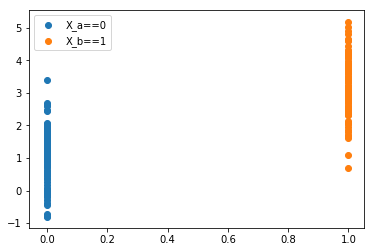

In [118]:
plt.figure
plt.scatter(y[y==0], X_a[y ==0], label = "X_a==0")
plt.scatter(y[y==1], X_a[y==1], label = "X_b==1")
plt.legend()
plt.showe

In [137]:
d = {'apples': X_a[y==0], 'oranges': X_a[y==1]}
df = pd.DataFrame(data = d)

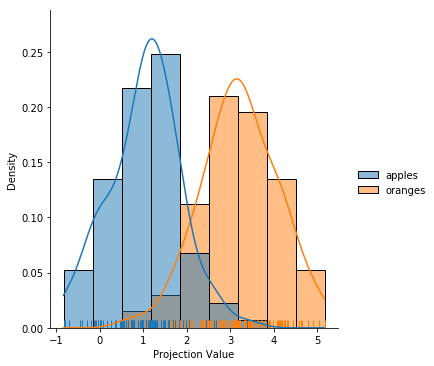

In [153]:
fig = sns.displot(df, kde=True, rug = True, stat= 'density')
fig.set_axis_labels("Projection Value")

H.04

In [159]:
image = plt.imread('natIMG.jpg')

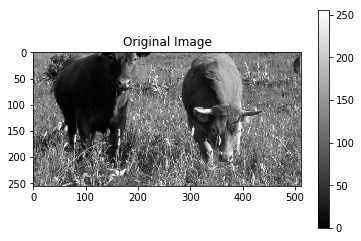

In [170]:
plt.figure()
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title("Original Image")
plt.show()

In [177]:
kernel = np.zeros((3, 3))
v = np.array([1, 2, 1])

kernel[:, 0] = -v.T
kernel[:, -1] = v.T
kernel

array([[-1.,  0.,  1.],
       [-2.,  0.,  2.],
       [-1.,  0.,  1.]])

In [184]:
from scipy import signal

edge_v = signal.convolve2d(image/255, kernel)
edge_h = signal.convolve2d(image/255, kernel.T)

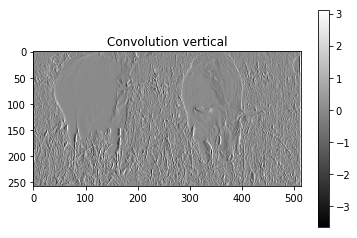

In [186]:
plt.figure()
plt.imshow(edge_v, cmap='gray')
plt.colorbar()
plt.title("Convolution vertical")
plt.show()

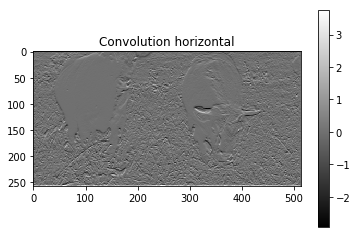

In [189]:
plt.figure()
plt.imshow(edge_h, cmap='gray')
plt.colorbar()
plt.title("Convolution horizontal")
plt.show()